In [1]:
import json
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import umap.umap_ as umap
import matplotlib.pyplot as plt

# 1. JSON 파일 불러오기
with open("data/text-embedding-3-small.json", "r", encoding="utf-8") as f:
    embedding_dict = json.load(f)

# 2. 키(한자)와 벡터 분리
tokens = list(embedding_dict.keys())
vectors = np.array([embedding_dict[token] for token in tokens])

# 3. 벡터 정규화 (cosine similarity 기준)
normalized_vectors = normalize(vectors)

# 4. KMeans 클러스터링
k = 5  # 원하는 클러스터 수로 조정
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_vectors)

/opt/homebrew/anaconda3/envs/hanja/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/opt/homebrew/anaconda3/envs/hanja/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/hanja/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


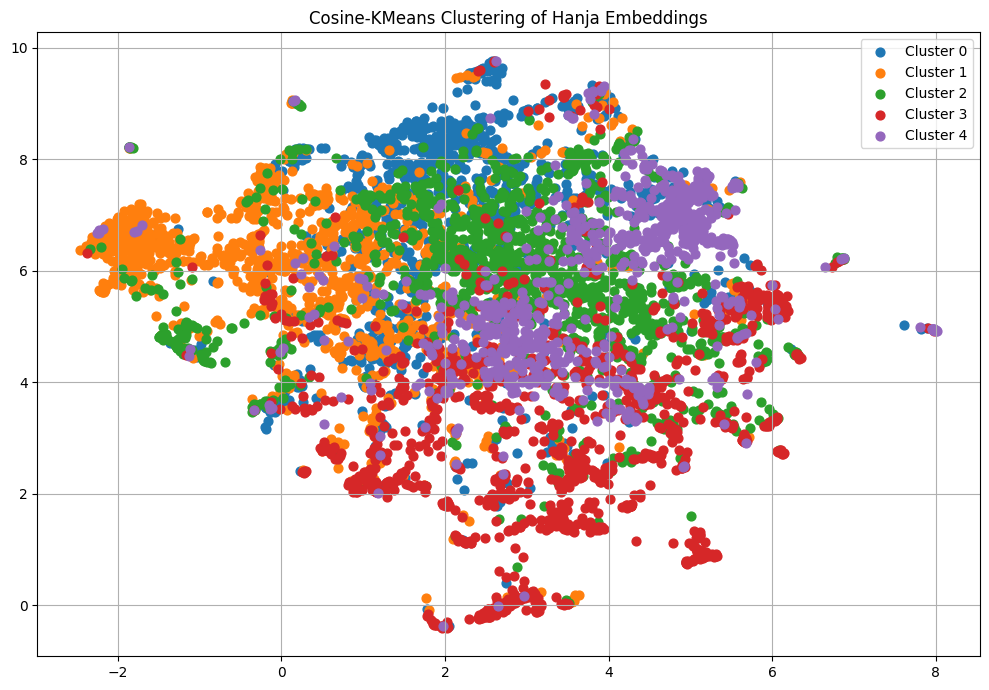

In [2]:
# 5. UMAP으로 차원 축소
reducer = umap.UMAP(n_components=2, random_state=42)
reduced_vectors = reducer.fit_transform(normalized_vectors)

# 6. 시각화
plt.figure(figsize=(10, 7))
for i in range(k):
    indices = np.where(cluster_labels == i)
    plt.scatter(reduced_vectors[indices, 0], reduced_vectors[indices, 1], label=f"Cluster {i}", s=40)

plt.title("Cosine-KMeans Clustering of Hanja Embeddings")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform



# OS에 따라 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='Nanum Gothic')
else:
    plt.rc('font', family='NanumGothic')  # Ubuntu 또는 기타

/var/folders/y1/_9m82vt913l986ymhxzkh3280000gn/T/ipykernel_97950/4067552028.py:17: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Nanum Gothic.
  plt.tight_layout()
/var/folders/y1/_9m82vt913l986ymhxzkh3280000gn/T/ipykernel_97950/4067552028.py:17: UserWarning: Glyph 35307 (\N{CJK UNIFIED IDEOGRAPH-89EB}) missing from font(s) Nanum Gothic.
  plt.tight_layout()
/var/folders/y1/_9m82vt913l986ymhxzkh3280000gn/T/ipykernel_97950/4067552028.py:17: UserWarning: Glyph 30177 (\N{CJK UNIFIED IDEOGRAPH-75E1}) missing from font(s) Nanum Gothic.
  plt.tight_layout()
/var/folders/y1/_9m82vt913l986ymhxzkh3280000gn/T/ipykernel_97950/4067552028.py:17: UserWarning: Glyph 24835 (\N{CJK UNIFIED IDEOGRAPH-6103}) missing from font(s) Nanum Gothic.
  plt.tight_layout()
/var/folders/y1/_9m82vt913l986ymhxzkh3280000gn/T/ipykernel_97950/4067552028.py:17: UserWarning: Glyph 26838 (\N{CJK UNIFIED IDEOGRAPH-68D6}) missing from font(s) Nanum Gothic.
  plt.tight_layout()
/var/folders/y1/_9m82vt913l986ym

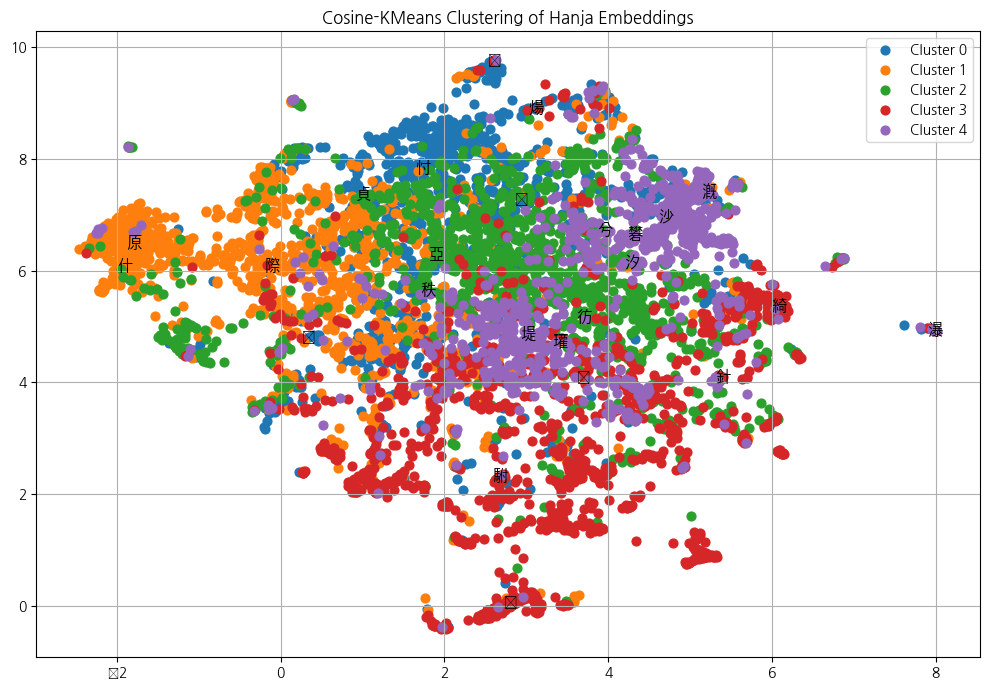

In [8]:
# 6. 시각화 한자 그룹으로
plt.figure(figsize=(10, 7))
for i in range(k):
    indices = np.where(cluster_labels == i)
    plt.scatter(reduced_vectors[indices, 0], reduced_vectors[indices, 1], label=f"Cluster {i}", s=40)

for i in range(k):
    indices = np.where(cluster_labels == i)[0]
    sample_indices = np.random.choice(indices, size=min(5, len(indices)), replace=False)
    for idx in sample_indices:
        plt.text(reduced_vectors[idx, 0], reduced_vectors[idx, 1], tokens[idx], fontsize=12, ha='center', va='center')


plt.title("Cosine-KMeans Clustering of Hanja Embeddings")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()